In [5]:
from utils.tools import *
from utils.fetch_stock_data import *
from utils.log import logger
import pickle
import pandas as pd
import numpy as np
import akshare as ak

from utils.tools import fetch_trade_date_hist

fetch_trade_date_hist('2021-01-01', '2021-01-31').index.strftime('%Y-%m-%d').tolist()



['2021-01-04',
 '2021-01-05',
 '2021-01-06',
 '2021-01-07',
 '2021-01-08',
 '2021-01-11',
 '2021-01-12',
 '2021-01-13',
 '2021-01-14',
 '2021-01-15',
 '2021-01-18',
 '2021-01-19',
 '2021-01-20',
 '2021-01-21',
 '2021-01-22',
 '2021-01-25',
 '2021-01-26',
 '2021-01-27',
 '2021-01-28',
 '2021-01-29']

In [11]:
def fetch_trade_date_hist(start_date, end_date):
    """
    返回指定日期间的交易日历
    Args: strat_date, end_date
    """
    trade_dates_hist = ak.tool_trade_date_hist_sina()
    trade_dates_hist['trade_date'] = pd.to_datetime(
        trade_dates_hist['trade_date'])
    trade_dates_hist.set_index('trade_date', inplace=True)
    return trade_dates_hist[start_date:end_date]

res = fetch_trade_date_hist('2021-01-01', '2021-01-31')
res

""
trade_date
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-11
2021-01-12
2021-01-13
2021-01-14


In [ ]:
index = pd.date_range('2023-03-03', '2023-05-30')
ts = pd.Series(np.random.randn(len(index)), index=index)
ts1 = ts[::2]
ts['2023-02-01':'2023-03-28']
ts.truncate(after='2023-03-28')

In [13]:
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=['a', 'b', 'c'])
df2 = pd.DataFrame({'C': [7, 8], 'D': ['a', 'b']}, index=['e', 'f'])

merged_df = df1.merge(df2, how='left',left_index=True, right_on='D')

print(merged_df)

     A  B    C  D
e    1  4  7.0  a
f    2  5  8.0  b
NaN  3  6  NaN  c


In [16]:
from pyecharts.charts import Line
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode

class MyMarkPointItem(opts.MarkPointItem):
    def render_item(self, **kwargs):
        value = self.value.replace("\n", "<br/>")
        return (f"{{name:'{self.name}', "
                f"coord:{self.coord}, "
                f"value:'{value}', "
                f"symbol:'{self.symbol}', "
                f"symbol_size:{self.symbol_size}, "
                f"label:{self.label}, "
                f"itemstyle:{self.itemstyle}, "
                f"emphasis:{self.emphasis}}}")

line = (
    Line()
    .add_xaxis(["A", "B", "C", "D", "E"])
    .add_yaxis("series", [1, 3, 9, 27, 81],
               markpoint_opts=opts.MarkPointOpts(
                   data=[
                       MyMarkPointItem(name="Maximum value",
                                       coord=["E", 81],
                                       value="This is the maximum value.\nSecond line of text."),
                       MyMarkPointItem(name="Minimum value",
                                       coord=["A", 1],
                                       value="This is the minimum value.\nSecond line of text.")
                   ]
               ))
    .set_global_opts(title_opts=opts.TitleOpts(title="Line Chart"))
)

line.render_notebook()  

In [23]:
from pyecharts import options as opts
from pyecharts.charts import Line
from pyecharts.globals import SymbolType
from pyecharts.commons.utils import JsCode

line = (
    Line()
    .add_xaxis(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    .add_yaxis(
        "A",
        [11, 11, 15, 13, 12, 13, 10],
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(
                    type_="max",
                    name=JsCode(
                        """
                        function(params) {
                            return 'Max<br>Value';
                        }
                        """
                    ),
                    symbol_size=50,
                    # symbol_offset=[0, "-50%"],
                    itemstyle_opts=opts.ItemStyleOpts(color="red"),
                ),
                opts.MarkPointItem(
                    type_="min",
                    name=JsCode(
                        """
                        function(params) {
                            return 'Min<br>Value';
                        }
                        """
                    ),
                    symbol_size=50,
                    # symbol_offset=[0, "-50%"],
                    itemstyle_opts=opts.ItemStyleOpts(color="green"),
                ),
            ]
        ),
        symbol=SymbolType.DIAMOND,
        symbol_size=10,
        linestyle_opts=opts.LineStyleOpts(width=4),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Line-多标记点"),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
    )
)

line.render_notebook()

In [27]:
from pyecharts import options as opts
from pyecharts.charts import Line

line = (
    Line()
    .add_xaxis(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    .add_yaxis(
        "A",
        [11, 11, 15, 13, 12, 13, 10],
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(
                    type_="max",
                    name="Max\nValue",
                    itemstyle_opts=opts.ItemStyleOpts(color="red"),
                    label=opts.LabelOpts(position="inside", formatter="{a}\n{b}"),
                ),
                opts.MarkPointItem(
                    type_="min",
                    name="Min\nValue",
                    itemstyle_opts=opts.ItemStyleOpts(color="green"),
                    label=opts.LabelOpts(position="inside", formatter="{a}\n{b}"),
                ),
            ]
        ),
        linestyle_opts=opts.LineStyleOpts(width=4),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Line-多标记点"),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
    )
)

line.render("line_multi_markpoint.html")


TypeError: MarkPointItem.__init__() got an unexpected keyword argument 'label'

In [19]:
from pyecharts import options as opts
from pyecharts.charts import Line

line = (
    Line()
    .add_xaxis(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    .add_yaxis("A", [11, 11, 15, 13, 12, 13, 10], markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="Max\nValue"),
                opts.MarkPointItem(type_="min", name="Min\nValue"),
            ]
        ))
    .set_global_opts(title_opts=opts.TitleOpts(title="Line-多标记点"))
)

line.render_notebook()

[1440.1, 1450.05, 1417.59, 1494.66, 1485.2, 1462.97, 1437.99, 1453.09, 1506.24, 1511.09, 1566.09, 1563.34, 1545.09, 1545.22, 1498.07, 1518.04, 1527.09, 1498.08, 1500.1, 1487.97, 1577.09, 1577.09, 1608.89, 1611.97, 1642.99, 1666.09, 1662.09, 1665.11, 1708.09, 1717.11, 1728.09, 1748.96, 1765.08, 1764.96, 1751.09, 1693.09, 1717.09, 1746.09, 1749.09, 1720.15, 1733.0, 1733.0, 1719.0, 1727.0, 1730.01, 1725.01, 1801.0, 1803.77, 1841.2, 1854.45, 1844.95, 1834.0, 1887.0, 1912.9, 1908.0, 1893.0, 1880.21, 1860.01, 1888.0, 1845.76, 1844.97, 1836.11, 1818.0, 1795.0, 1797.0, 1784.0, 1818.0, 1810.0, 1856.35, 1843.79, 1841.0, 1861.82, 1820.78, 1875.0, 1867.0, 1836.0, 1818.0, 1788.0, 1810.41, 1813.74, 1838.53, 1828.0, 1818.04, 1807.14, 1788.3, 1770.42, 1770.02, 1750.0, 1762.0, 1766.0, 1750.92, 1751.99, 1742.0, 1729.6, 1775.0, 1773.35, 1774.86, 1778.62, 1767.79, 1781.8]


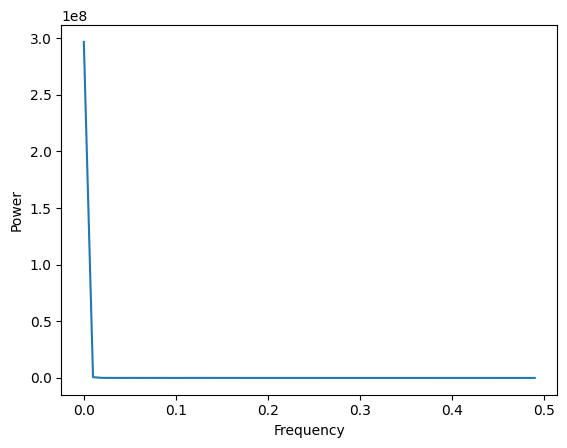

In [6]:
import numpy as np
from scipy.fft import fft
import akshare as ak

# 生成股票价格序列
price = np.random.rand(1000)
price = ak.stock_zh_a_hist(symbol="600519", start_date='20220930',end_date = '20231101',adjust="qfq")['收盘'].to_list()
print(price)

# 对价格序列进行傅里叶变换
fft_price = fft(price)

# 计算频域能量分布
power = np.abs(fft_price) ** 2

# 将频域能量分布转换为功率谱密度（PSD）
psd = power / len(price)

# 绘制频域能量分布图
import matplotlib.pyplot as plt

freq = np.arange(len(price)) / len(price)  # 频率范围
plt.plot(freq[:len(price)//2], psd[:len(price)//2])  # 只显示前一半频率范围
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()